**Set up notebook:**

In [2]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [3]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

**Load dataset:**

In [4]:
#Read WTG data
signals = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)
all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'])
all_data.set_index('Timestamp', inplace=True)

#Filter T_01 data out
wtg_data = all_data[all_data.Turbine_ID == 'T07']

#wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                object
Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 82, dtype: object


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,T07,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,32,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3
2016-01-01 00:10:00+00:00,T07,1271.1,1233.4,1251.9,7.1,42.0,62,62,62,32,...,-469.6,0.0,-763.5,180.8,469.6,763.5,0.0,180.8,39,203.9
2016-01-01 00:20:00+00:00,T07,1276.7,1229.1,1251.1,9.5,42.0,62,62,62,32,...,-503.5,-62.2,-1000.0,221.6,503.5,1000.0,62.2,221.6,39,197.0
2016-01-01 00:30:00+00:00,T07,1408.5,1227.0,1259.9,25.4,42.0,63,62,62,32,...,-592.2,-147.7,-1000.0,229.1,592.2,1000.0,147.7,229.1,39,204.0
2016-01-01 00:40:00+00:00,T07,1366.1,1236.5,1288.2,32.8,42.0,63,63,63,32,...,-997.1,-908.9,-1000.0,13.6,997.1,1000.0,908.9,13.6,40,203.9


In [5]:
wtg_data.tail()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:10:00+00:00,T07,1576.2,1253.8,1387.4,79.7,39.0,64,64,63,30,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,314.6
2017-12-31 23:20:00+00:00,T07,1577.7,1231.2,1343.0,87.5,39.0,63,63,63,30,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,321.0
2017-12-31 23:30:00+00:00,T07,1282.8,1232.5,1250.7,8.5,38.0,63,63,62,30,...,-980.9,-672.6,-1000.0,55.2,980.9,1000.0,672.6,55.2,33,321.0
2017-12-31 23:40:00+00:00,T07,1269.8,1230.8,1250.2,6.9,38.0,62,62,61,30,...,-986.2,-828.8,-1000.0,34.2,986.2,1000.0,828.8,34.2,33,325.0
2017-12-31 23:50:00+00:00,T07,1329.9,1193.0,1257.6,18.9,38.0,61,61,61,30,...,-966.0,-256.3,-1000.0,109.8,966.0,1000.0,256.3,109.8,32,334.8


In [6]:
#Read log data
logs = 'wind-farm-1-logs-training.csv'
logs_test = 'wind-farm-1-logs-testing.csv'
log_data = pd.concat([pd.read_csv(data_folder + logs, delimiter=';'), pd.read_csv(data_folder + logs_test, delimiter=';')], ignore_index=True)
log_data['TimeDetected'] = pd.to_datetime(log_data['TimeDetected'])
log_data.set_index('TimeDetected', inplace=True)
log_data = log_data[log_data['UnitTitle'] == 'T07']
log_data.head()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2016-01-01 00:17:13+00:00,NaN,T07,External power ref.:2000kW,NaN
2016-01-01 00:47:13+00:00,NaN,T07,External power ref.:2000kW,NaN
2016-01-01 01:17:13+00:00,NaN,T07,External power ref.:2000kW,NaN
2016-01-01 01:47:13+00:00,NaN,T07,External power ref.:2000kW,NaN
2016-01-01 01:54:34+00:00,NaN,T07,"Gen. ext. vent. 2, temp: 65°C",NaN


In [7]:
log_data.tail()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2017-12-31 21:52:17+00:00,NaN,T07,External power ref.:2000kW,NaN
2017-12-31 22:22:17+00:00,NaN,T07,External power ref.:2000kW,NaN
2017-12-31 22:52:17+00:00,NaN,T07,External power ref.:2000kW,NaN
2017-12-31 23:22:17+00:00,NaN,T07,External power ref.:2000kW,NaN
2017-12-31 23:52:16+00:00,NaN,T07,External power ref.:2000kW,NaN


In [ ]:
#@title Following failures were reported for the turbine:


In [ ]:
#@title Failure 1: GENERATOR_BEARING April 30, 2016 12:40 PM High temperature in generator bearing (replaced sensor)


In [9]:
#Logs containing "bearing 1": related to generator bearing 1 damage
logs_1 = log_data[log_data.Remark.str.contains('bearing 1', na=False, case=False)].rename(columns={'Remark' : 'Remark_1'})
logs_1

,TimeReset,UnitTitle,Remark_1,UnitTitleDestination
TimeDetected,,,,
2016-04-29 18:03:55+00:00,2016-04-29 19:16:00,T07,High temp. Gen bearing 1:176°C,NaN
2016-04-29 19:21:59+00:00,2016-04-29 20:25:37,T07,High temp. Gen bearing 1:154°C,NaN
2016-04-30 12:28:15+00:00,NaN,T07,High temp. Gen bearing 1:204°C,NaN


In [ ]:
#@title Failure Group 2: TRANSFORMER July 10, 2016 3:46 AM High temperature transformer; August 23, 2016 2:21 AM High temperature transformer. Transformer refrigeration repaired


In [10]:
#Logs containing "Hot HV trafo": related to transformer damage
logs_2 = log_data[log_data.Remark.str.contains('Hot HV trafo', na=False, case=False)].rename(columns={'Remark' : 'Remark_2'})
logs_2

,TimeReset,UnitTitle,Remark_2,UnitTitleDestination
TimeDetected,,,,
2016-07-03 16:29:42+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2016-07-03 16:29:43+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2016-07-03 16:29:46+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2016-07-03 16:29:47+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2016-07-03 16:38:02+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
...,...,...,...,...
2017-08-11 18:04:00+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2017-08-11 18:04:01+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN
2017-08-11 18:04:03+00:00,NaN,T07,Hot HV trafo 270°C 0kW,NaN


In [ ]:
#@title Failure Group 3: HYDRAULIC_GROUP June 17, 2017 11:35 AM Oil leakage in Hub; October 19, 2017 10:11 AM Oil leakage in Hub

In [11]:
#Logs containing "leakage": related to hydraulic group damage
logs_3 = log_data[log_data.Remark.str.contains('leakage', na=False, case=False)].rename(columns={'Remark' : 'Remark_3'})
logs_3

,TimeReset,UnitTitle,Remark_3,UnitTitleDestination
TimeDetected,,,,
2017-06-16 22:07:49+00:00,2017-06-16 23:06:23,T07,Oil leakage in Hub,NaN
2017-06-16 22:11:36+00:00,2017-06-16 23:06:23,T07,Oil leakage in Hub,NaN
2017-06-16 23:08:52+00:00,2017-06-17 12:18:25,T07,Oil leakage in Hub,NaN
2017-07-04 09:04:35+00:00,NaN,T07,Oil leakage in Hub,NaN
2017-07-04 09:30:40+00:00,NaN,T07,Oil leakage in Hub,NaN
2017-08-07 06:18:20+00:00,2017-08-07 06:41:05,T07,Oil leakage in Hub,NaN
2017-08-07 06:34:52+00:00,2017-08-07 06:41:05,T07,Oil leakage in Hub,NaN
2017-08-07 06:41:41+00:00,2017-08-07 07:19:11,T07,Oil leakage in Hub,NaN
2017-08-10 17:10:32+00:00,NaN,T07,Oil leakage in Hub,NaN


In [ ]:
#@title Failure 4: GENERATOR_BEARING August 20, 2017 6:08 AM Generator bearings damaged


In [14]:
#Logs containing "bearing 2": related to generator bearing 2 damage
logs_4 = log_data[log_data.Remark.str.contains('bearing 2', na=False, case=False)].rename(columns={'Remark' : 'Remark_4'})
logs_4

,TimeReset,UnitTitle,Remark_4,UnitTitleDestination
TimeDetected,,,,
2017-08-28 11:15:40+00:00,NaN,T07,High temp. Gen bearing 2:204°C,NaN
2017-08-28 17:57:09+00:00,NaN,T07,High temp. Gen bearing 2:204°C,NaN


In [ ]:
#@title Failure 5: GENERATOR August 21, 2017 2:47 PM Generator damaged


In [21]:
#NO RELEVANT LOGS FOUND
logs_5 = log_data[log_data.Remark.str.contains('High temperature Gen', na=False, case=False)].rename(columns={'Remark' : 'Remark_5'})
logs_5

,TimeReset,UnitTitle,Remark_5,UnitTitleDestination
TimeDetected,,,,


In [22]:
#Create a new column to label the signals: 'F1'/'F2'/'F3'/'F4'/'F5' : Log entry related to 1st/2nd/3rd/4th/5th Failure was found during the previous 10 min, 
#'Reported' : Failure reported by the technician at this time, 'None': nothing reported or logged
#Initialize to 'None'
wtg_data['Failure'] = 'None'

#Join with log data for Failure 1
wtg_data = pd.merge_asof(wtg_data, logs_1['Remark_1'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F1'
wtg_data.loc[wtg_data.Remark_1.str.contains('bearing 1', na=False, case=False), 'Failure'] = 'F1'

#Join with log data for Failure 2
wtg_data = pd.merge_asof(wtg_data, logs_2['Remark_2'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F2'
wtg_data.loc[wtg_data.Remark_2.str.contains('Hot HV trafo', na=False, case=False), 'Failure'] = 'F2'

#Join with log data for Failure 3
wtg_data = pd.merge_asof(wtg_data, logs_3['Remark_3'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F3'
wtg_data.loc[wtg_data.Remark_3.str.contains('leakage', na=False, case=False), 'Failure'] = 'F3'

#Join with log data for Failure 4
wtg_data = pd.merge_asof(wtg_data, logs_4['Remark_4'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F4'
wtg_data.loc[wtg_data.Remark_4.str.contains('bearing 2', na=False, case=False), 'Failure'] = 'F4'

#Label reported failures
wtg_data.loc['2016-04-30 12:40:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-07-10 03:50:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-08-23 02:30:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-06-17 11:40:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-08-20 06:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-08-21 14:50:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-10-19 10:20:00+00:00', 'Failure'] = 'Reported'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
#Validate
wtg_data['2016-04-30' : '2016-04-30'].dropna(subset=['Remark_1'])

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_1,Remark_2,Remark_3,Remark_4
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-30 12:30:00+00:00,T07,30.1,0.0,4.1,6.8,85.0,35,35,34,42,...,0.0,0.0,0.0,32,100.5,F1,High temp. Gen bearing 1:204°C,NaN,NaN,NaN


In [24]:
wtg_data = wtg_data[~wtg_data.index.duplicated()]
x='Timestamp'
c1= '#d3d3d3'
style = 'Failure'
hue = 'Failure'
s = 80

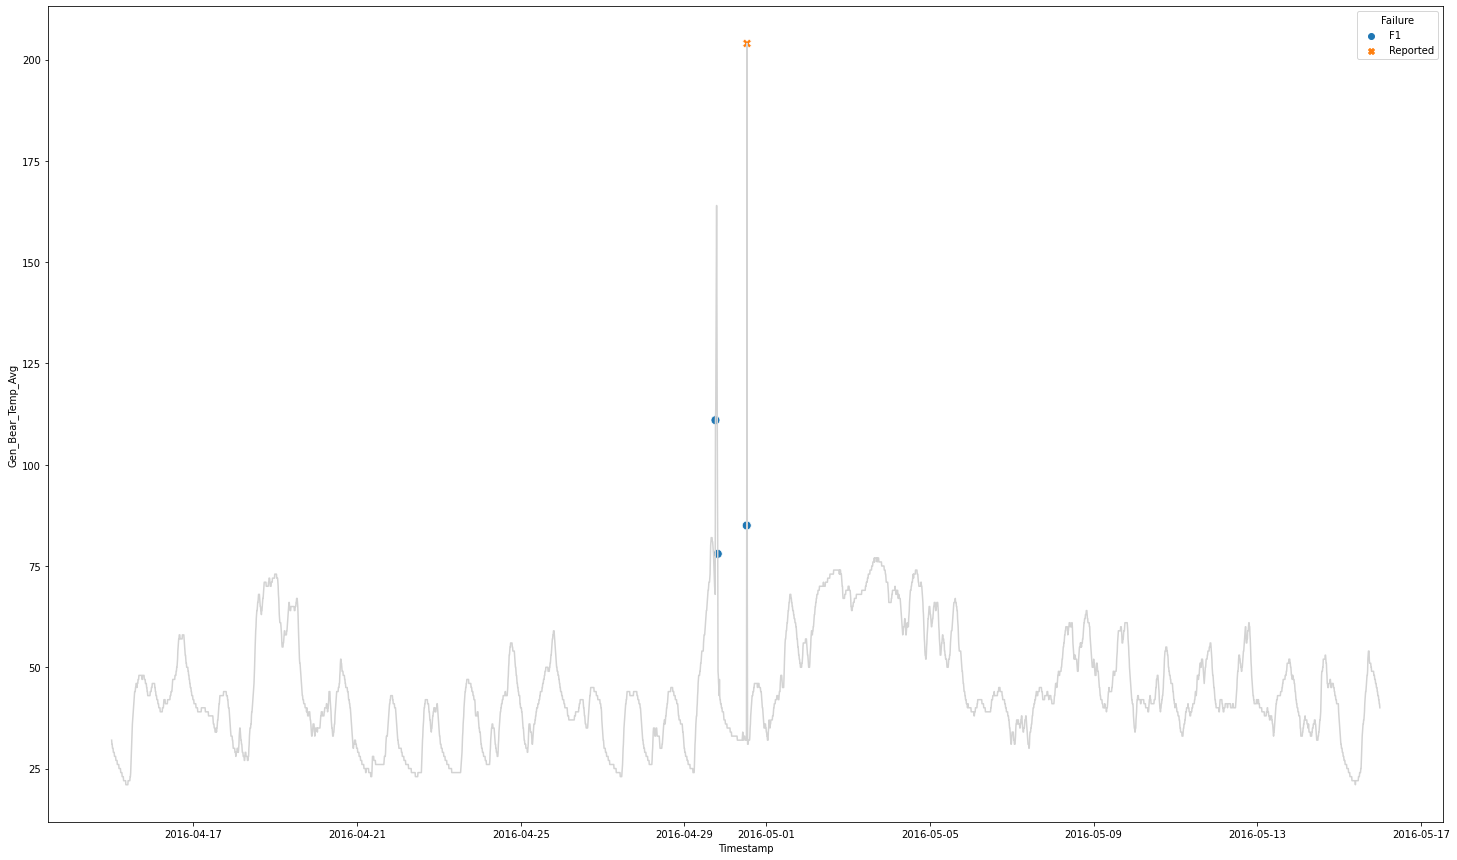

In [25]:
#Visualize Failure 1
y = 'Gen_Bear_Temp_Avg'
data = wtg_data['2016-04-15' : '2016-05-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

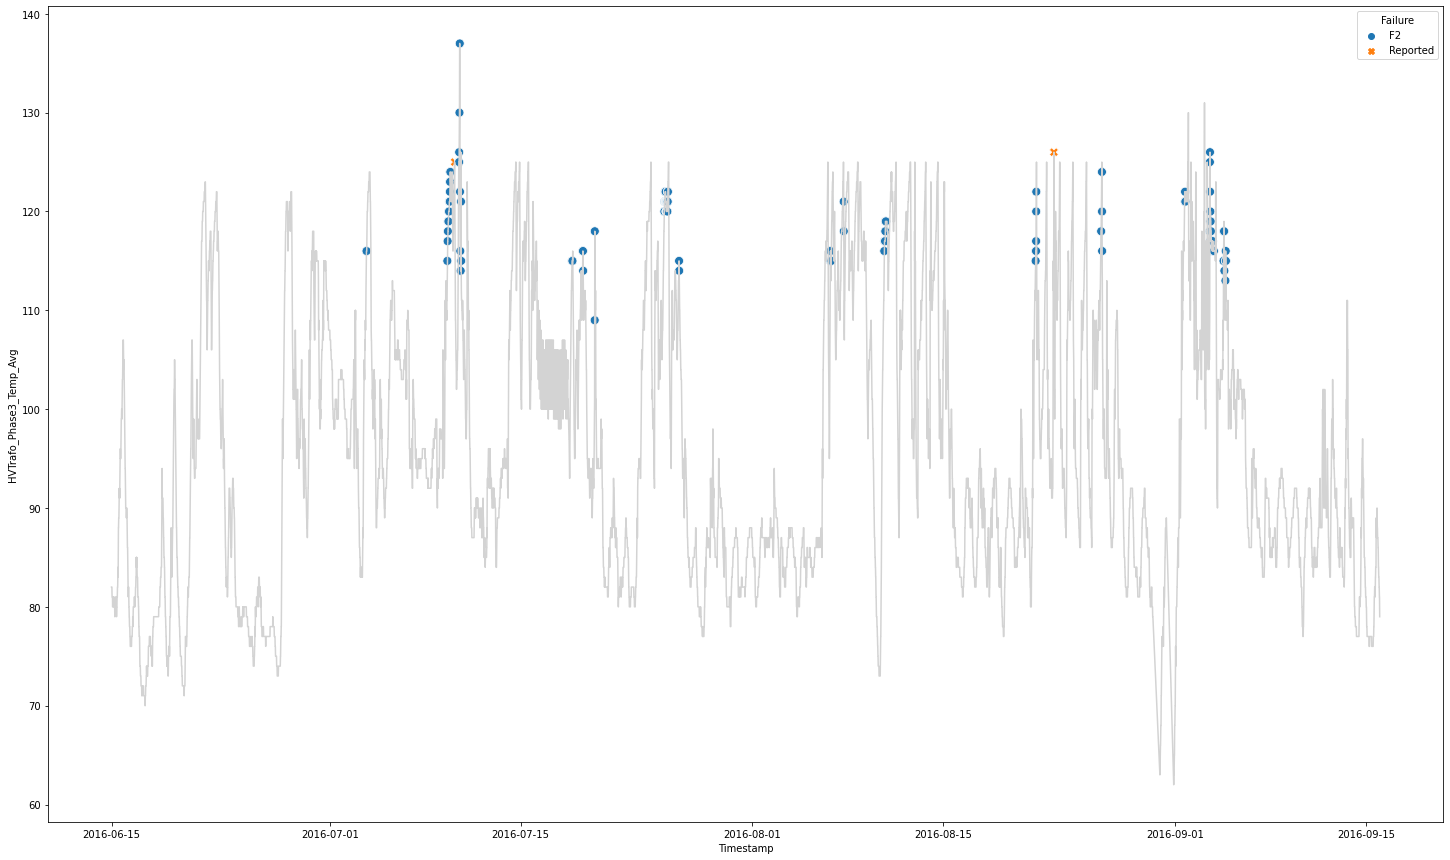

In [28]:
#Visualize Failure 2 (phase 3)
y = 'HVTrafo_Phase3_Temp_Avg'
data = wtg_data['2016-06-15' : '2016-09-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

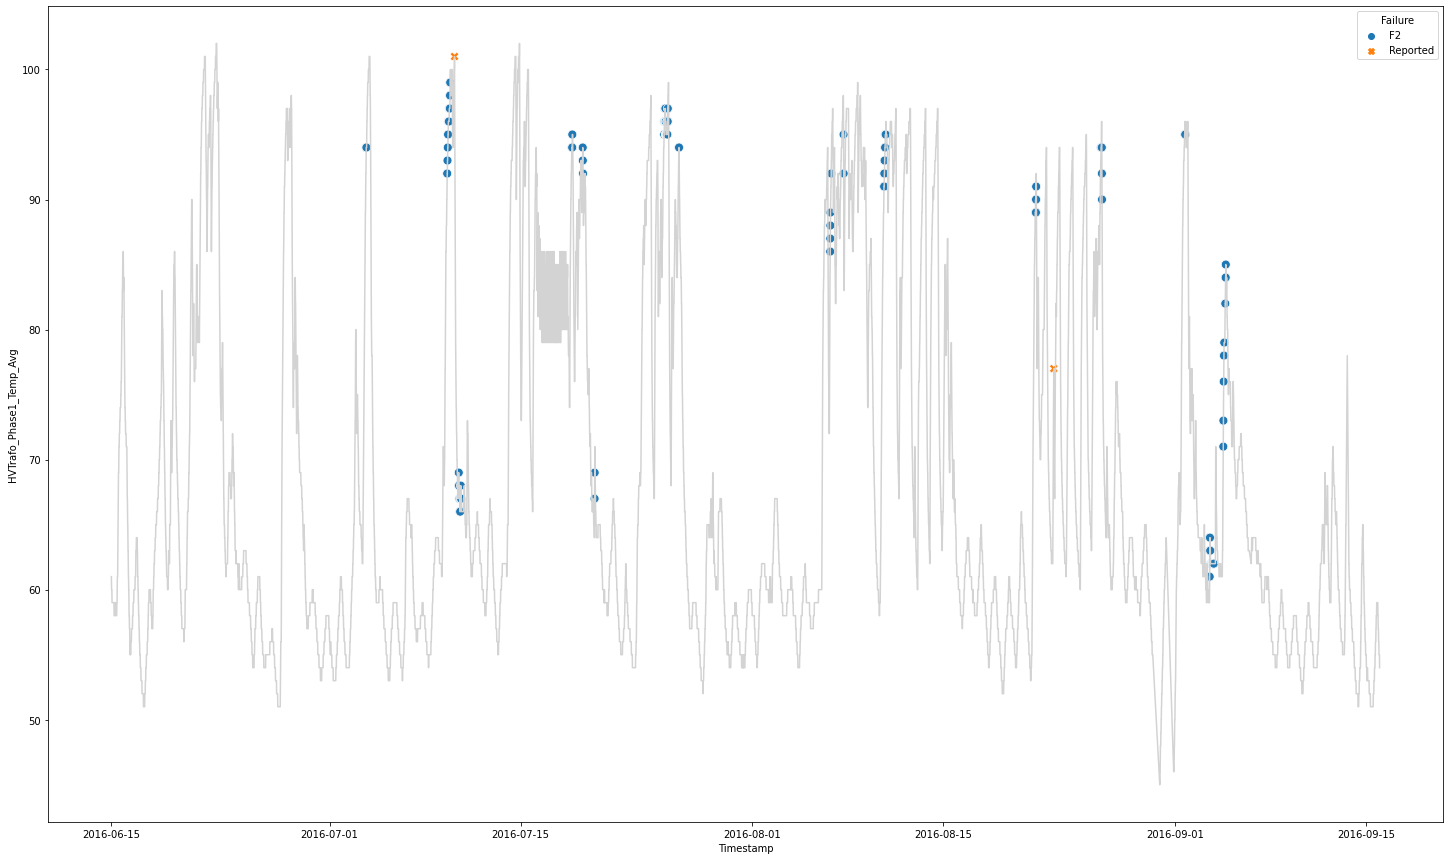

In [29]:
#Visualize Failure 2 (phase 1)
y = 'HVTrafo_Phase1_Temp_Avg'
data = wtg_data['2016-06-15' : '2016-09-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

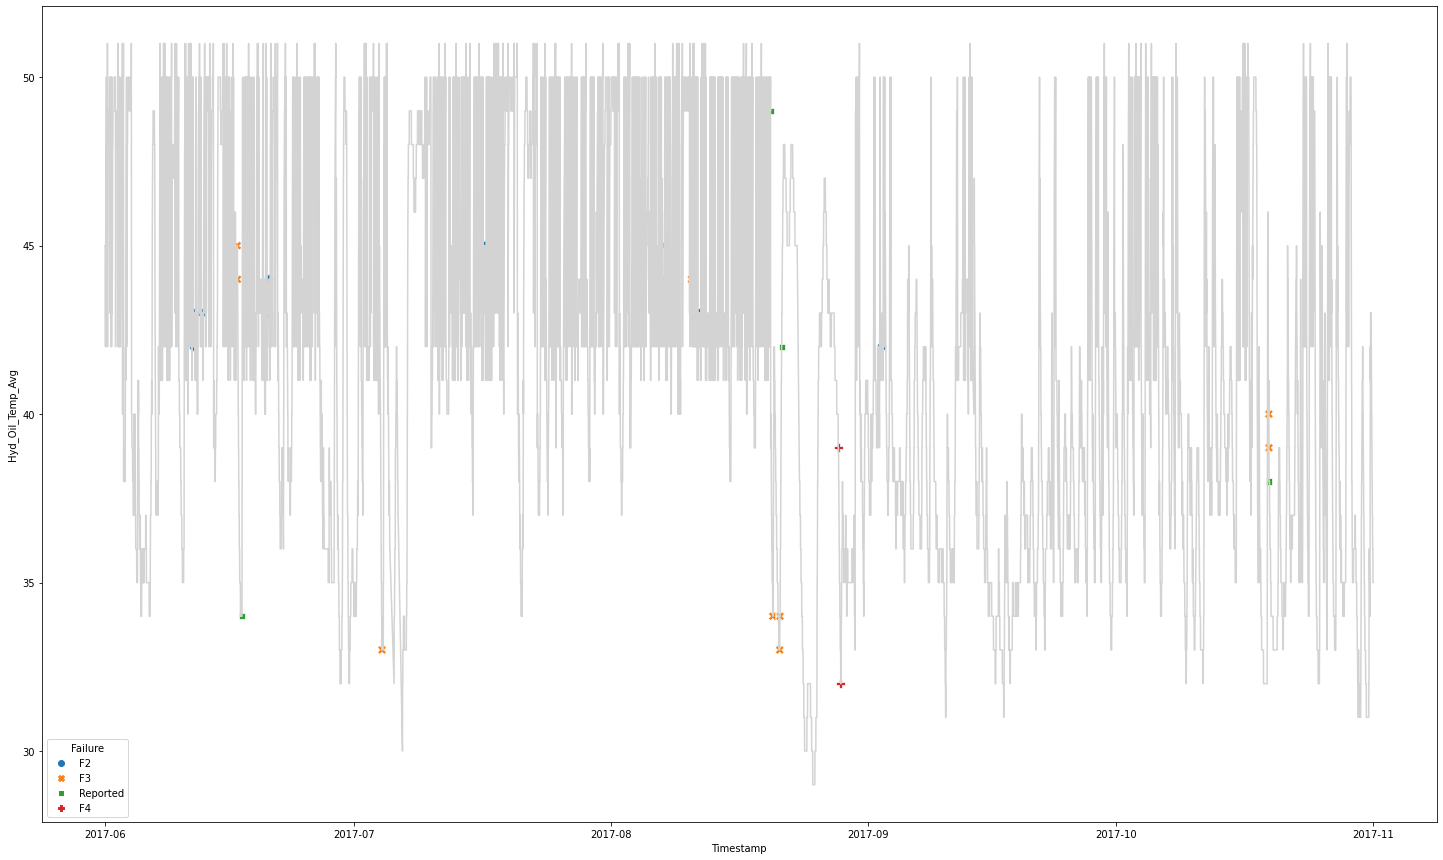

In [30]:
#Visualize Failure 3
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-06-01' : '2017-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

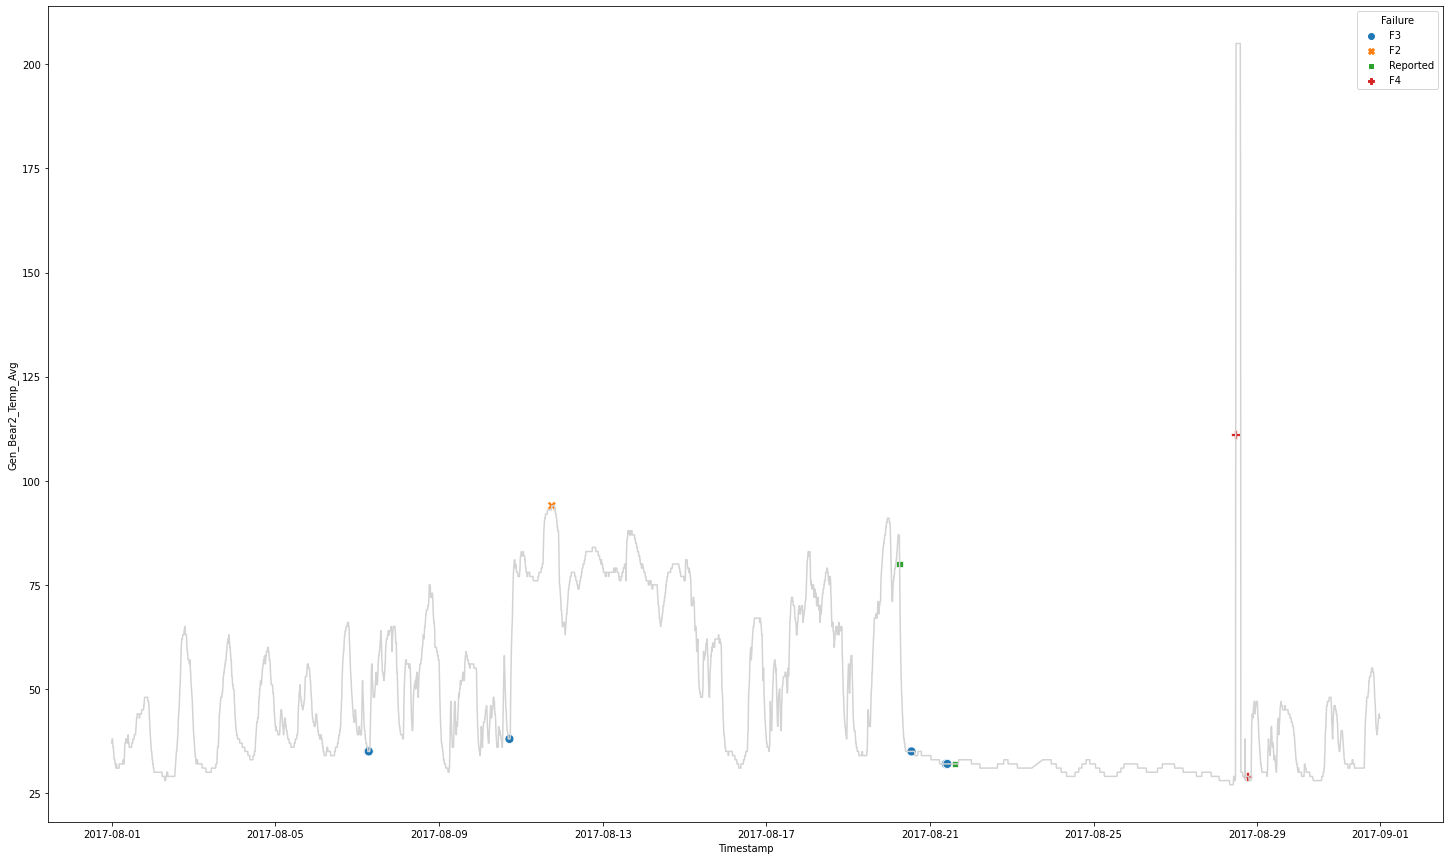

In [31]:
#Visualize Failure 4
y = 'Gen_Bear2_Temp_Avg'
data = wtg_data['2017-08-01' : '2017-08-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

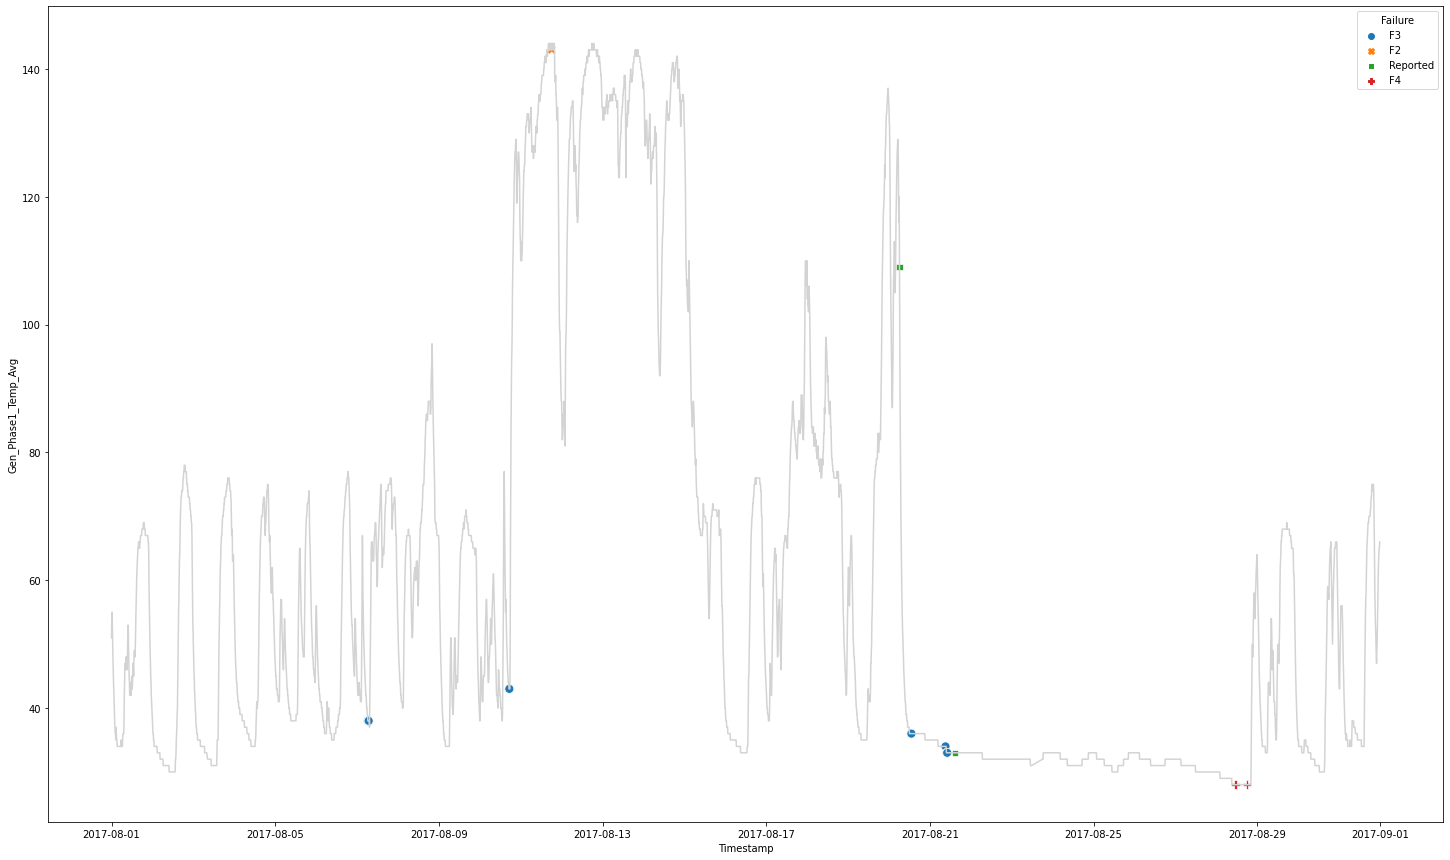

In [32]:
#Visualize Failure 5
y = 'Gen_Phase1_Temp_Avg'
data = wtg_data['2017-08-01' : '2017-08-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])